Cryptography

Tagging along with Polylog and le Chat

References:

[I can prove I’ve solved this Sudoku without revealing it - Polylog](https://youtu.be/Otvcbw6k4eo?si=0PMUnGsDrkqXEeVc)

Tutor:

Mistral's AI, le Chat

Zero-knowledge proofs (ZKPs) are a cryptographic method that allows one party (the prover) to convince another party (the verifier) that a statement is true without revealing any information beyond the validity of the statement itself. This means the verifier learns nothing about the underlying data except that the statement is true .

Key characteristics of ZKPs include:

1. **Completeness**: If the statement is true, an honest verifier can be convinced by an honest prover.
2. **Soundness**: If the statement is false, no dishonest prover can convince an honest verifier that it is true.
3. **Zero-Knowledge**: The verifier gains no additional knowledge from the interaction other than the truth of the statement .

ZKPs can be interactive, where the prover and verifier exchange messages, or non-interactive, where the prover sends a single message that the verifier can check independently .

These proofs are used in various applications, including blockchain technology, to enhance privacy and security by allowing parties to verify information without exposing sensitive data .

To include a zero-knowledge proof (ZKP) in the context of the graph coloring problem, we can simulate a simple ZKP scenario where a prover convinces a verifier that the graph is correctly colored without revealing the actual colors of the nodes.

Here's an updated script that includes a basic simulation of a zero-knowledge proof for the graph coloring:

### Explanation:
1. **Graph Creation**: The script creates a graph with 6 nodes and 7 edges, including a triangle.
2. **Coloring**: It assigns three colors ('red', 'green', 'blue') to the nodes such that no two adjacent nodes share the same color.
3. **Zero-Knowledge Proof Simulation**:
   - **Prover's Commitment**: The prover sends a permutation of the colors to the verifier.
   - **Verifier's Challenge**: The verifier asks the prover to reveal the colors of a randomly chosen edge.
   - **Prover's Response**: The prover reveals the colors of the chosen edge.
   - **Verifier's Check**: The verifier checks that the revealed colors are different, confirming the graph is correctly colored.
4. **Drawing**: The graph is drawn using the `spring_layout` for positioning the nodes and `matplotlib` for visualization.

### Note:
- The zero-knowledge proof simulation demonstrates how the prover can convince the verifier that the graph is correctly colored without revealing the entire coloring scheme.
- This is a simplified example and does not cover all aspects of a formal zero-knowledge proof protocol.

You can run this script in a Python environment with NetworkX and Matplotlib installed to visualize the graph and simulate the zero-knowledge proof.

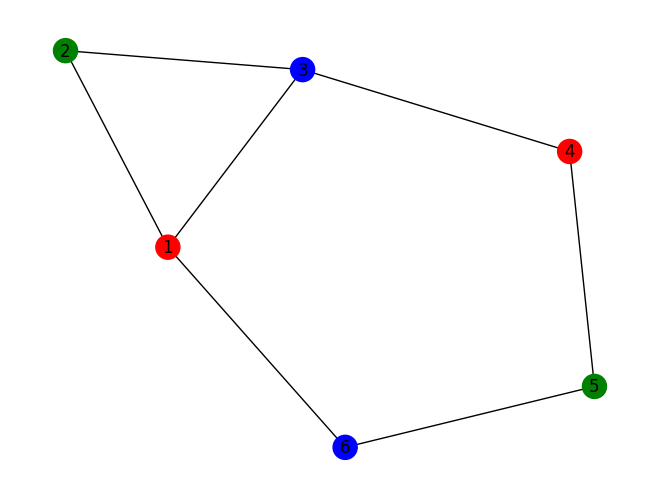

Prover's commitment (permuted colors):
Node 1: red
Node 2: green
Node 3: blue
Node 4: red
Node 5: green
Node 6: blue

Verifier's challenge: Reveal the colors of the edge (1, 3)
Prover's response: Node 1 is red, Node 3 is blue
Verifier is convinced: The graph is correctly colored.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a graph
G = nx.Graph()

# Add 6 nodes
G.add_nodes_from(range(1, 7))

# Add 7 edges to make the graph non-bipartite and include a triangle
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 6), (6, 1)]
G.add_edges_from(edges)

# Define a coloring for the nodes such that no adjacent nodes have the same color
# Using 3 colors: 'red', 'green', 'blue'
color_map = {1: 'red', 2: 'green', 3: 'blue', 4: 'red', 5: 'green', 6: 'blue'}

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color=[color_map[node] for node in G.nodes()])

# Display the graph
plt.show()

# Simulate a zero-knowledge proof for graph coloring
def zero_knowledge_proof(G, color_map):
    # Prover's commitment: Send a permutation of the colors
    colors = list(set(color_map.values()))
    permuted_colors = colors[:]
    random.shuffle(permuted_colors)
    color_permutation = {color: permuted_colors[i] for i, color in enumerate(colors)}
    permuted_color_map = {node: color_permutation[color_map[node]] for node in G.nodes()}

    print("Prover's commitment (permuted colors):")
    for node, color in permuted_color_map.items():
        print(f"Node {node}: {color}")

    # Verifier's challenge: Ask to reveal the color of a random edge
    edge = random.choice(list(G.edges()))
    print(f"\nVerifier's challenge: Reveal the colors of the edge {edge}")

    # Prover's response: Reveal the colors of the chosen edge
    node1, node2 = edge
    revealed_colors = {node1: color_map[node1], node2: color_map[node2]}
    print(f"Prover's response: Node {node1} is {revealed_colors[node1]}, Node {node2} is {revealed_colors[node2]}")

    # Verifier's check: Ensure the revealed colors are different
    if revealed_colors[node1] != revealed_colors[node2]:
        print("Verifier is convinced: The graph is correctly colored.")
    else:
        print("Verifier is not convinced: The graph is not correctly colored.")

# Run the zero-knowledge proof simulation
zero_knowledge_proof(G, color_map)
